<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL4.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL2.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL3.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL1.png' width="80%" height="80%"></img>




# Getting started:
Create a SQL Context from the Spark Context, sc.  The Spark Context is predefined in each notebook.

In [1]:
#sqlContext is used for defining DataFrames and working with SparkSQL
#Use sc to create our sqlContext, sc has the connection information for the
#Spark enviroment

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# DataFrames, not RDDs
Previously, we had worked on Resilient Distributed Datasets (RDD).  DataFrames are a subset of RDDs that have named columns.  DataFrames are still replicated, distrubuted, and immutable.  

# World Bank Data
A data file from the World Bank will be downloaded from GitHub.  

In [2]:
# In the Data Science Experience you can prefice commands with a ! to run shell commands.
# Here we remove any files with the name of the file we are going to download and
# then download the file

!rm world_bank.json.gz -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

--2016-09-15 18:39:25--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: 'world_bank.json.gz'

100%[======================================>] 446,287     --.-K/s   in 0.02s   

2016-09-15 18:39:25 (21.8 MB/s) - 'world_bank.json.gz' saved [446287/446287]



# Create a DataFrame from a File
A DataFrame will be created using the sqlContext to read the file. Many other file types are supported including text and [Parquet](https://parquet.apache.org/).  
Creating a DataFrame from a filetype such as json that has some metadata, allows a schema to be inferred.  

In [3]:
#You can load json, text, and other files using sqlContext.
#Unlike an RDD, this will attempt to create a schema around the data.
#Self describing data works really well for this.

WorldBankdf = sqlContext.read.json("world_bank.json.gz")

# Printing the schema and read.json
The read.json method will behave similar to jsonFile(), which has been depricated.  Here is the documentation: [schema inference](http://spark.apache.org/docs/latest/sql-programming-guide.html#inferring-the-schema-using-reflection).  To print the schema, use the printSchema method on any dataframe.

In [4]:
#Print out the schema to see the shape of the data
print WorldBankdf.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

# Examining the data
The take method for RDDs also works for DataFrames.  

In [5]:
WorldBankdf.take(2)
 

[Row(_id=Row($oid=u'52b213b38594d8a2be17c780'), approvalfy=u'1999', board_approval_month=u'November', boardapprovaldate=u'2013-11-12T00:00:00Z', borrower=u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate=u'2018-07-07T00:00:00Z', country_namecode=u'Federal Democratic Republic of Ethiopia!$!ET', countrycode=u'ET', countryname=u'Federal Democratic Republic of Ethiopia', countryshortname=u'Ethiopia', docty=u'Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode=u'C', grantamt=0, ibrdcommamt=0, id=u'P129828', idacommamt=130000000, impagency=u'MINISTRY OF EDUCATION', lendinginstr=u'Investment Project Financing', lendinginstrtype=u'IN', lendprojectcost=550000000, majorsector_percent=[Row(Name=u'Education', Percent=46), Row(Name=u'Education', Percent=26), Row(Name=u'Public Administration, Law, and Justice', Percent=16), Row(Name=u'Education', Percent=12)], mjsector_namecode=[Row(code=u'EX', name=u'Education'), Row(code=u'EX', name=u'

That output is a bit messy!  Is there a better way to view it?  The [Pandas](http://pandas.pydata.org/) library has a great helper function.
<img src='http://pandas.pydata.org/_static/pandas_logo.png'></img>

In [6]:
WorldBankdf.toPandas()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,"(52b213b38594d8a2be17c780,)",1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"(Education for all, 100)","[(65, Education for all)]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,"(52b213b38594d8a2be17c781,)",2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,None,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"(Other economic management, 30)","[(24, Other economic management), (54, Social ...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,"(52b213b38594d8a2be17c782,)",2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,None,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"(Regional integration, 46)","[(47, Regional integration), (25, Administrati...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,"(52b213b38594d8a2be17c783,)",2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,None,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"(Participation and civic engagement, 50)","[(57, Participation and civic engagement), (59...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,"(52b213b38594d8a2be17c784,)",2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"(Export development and competitiveness, 30)","[(45, Export development and competitiveness),...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,"(52b213b38594d8a2be17c785,)",2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,None,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"(Social safety nets, 100)","[(54, Social safety nets)]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,"(52b213b38594d8a2be17c786,)",2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"(Administrative and civil service reform, 20)","[(25, Administrative and civil service reform)...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,"(52b213b38594d8a2be17c787,)",2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,None,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"(Climate change, 100)","[(81, Climate change)]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,"(52b213b38594d8a2be17c788,)",2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"(Other rural development, 87)","[(79, Other rural development)]",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,"(52b213b38594d8a2be17c789,)",2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"(Other accountability/anti-corruption, 33)","[(29, Other accountability/anti-corruption), (...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


# Register a Temporary Table 
A temporary table is a pointer to the DataFrame that allows data access via Spark SQL.  Once our Spark session ends, the table will go away.  

In [7]:
#Simply use the DataFrame Object to create the table.
WorldBankdf.registerTempTable("worldbank")

# How to execute SQL-like commands
Now that the table is registered we can execute SQL commands through Apache Spark.  The returned object from the .sql method is another DataFrame:


In [8]:
WorldBankLimited =  sqlContext.sql("select * from worldbank limit 2")

print type(WorldBankLimited)
print "*" * 20
print WorldBankLimited

<class 'pyspark.sql.dataframe.DataFrame'>
********************
DataFrame[_id: struct<$oid:string>, approvalfy: string, board_approval_month: string, boardapprovaldate: string, borrower: string, closingdate: string, country_namecode: string, countrycode: string, countryname: string, countryshortname: string, docty: string, envassesmentcategorycode: string, grantamt: bigint, ibrdcommamt: bigint, id: string, idacommamt: bigint, impagency: string, lendinginstr: string, lendinginstrtype: string, lendprojectcost: bigint, majorsector_percent: array<struct<Name:string,Percent:bigint>>, mjsector_namecode: array<struct<code:string,name:string>>, mjtheme: array<string>, mjtheme_namecode: array<struct<code:string,name:string>>, mjthemecode: string, prodline: string, prodlinetext: string, productlinetype: string, project_abstract: struct<cdata:string>, project_name: string, projectdocs: array<struct<DocDate:string,DocType:string,DocTypeDesc:string,DocURL:string,EntityID:string>>, projectfinancialty

# Formatting the Output
Again, the format is a bit cumbersome and difficult to read.  Let's use Pandas again to adjust the formatting.  

In [9]:
#One nice feature of Jupyter is that we can show it in a table via Pandas
WorldBankLimited.toPandas()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,"(52b213b38594d8a2be17c780,)",1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"(Education for all, 100)","[(65, Education for all)]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,"(52b213b38594d8a2be17c781,)",2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,None,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"(Other economic management, 30)","[(24, Other economic management), (54, Social ...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


# Group by
Let's group our data by geographic region.  We'll continue to use the toPandas for formatting the output here in our notebook.

In [10]:
#Here is a simple group by example.  Note the use of triple quotes.

query = """
select
    regionname , 
    count(*) as project_count
from worldbank
group by regionname 
order by count(*) desc
"""

sqlContext.sql(query).toPandas()

,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100
2,Europe and Central Asia,74
3,South Asia,65
4,Middle East and North Africa,54
5,Latin America and Caribbean,53
6,Other,2


In [11]:
#Subquerries are no problem:
query = """

select * from
    (select
        regionname ,
        count(*) as project_count
    from worldbank
    group by regionname 
    order by count(*) desc) table_alias
"""
sqlContext.sql(query).toPandas()

,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100
2,Europe and Central Asia,74
3,South Asia,65
4,Middle East and North Africa,54
5,Latin America and Caribbean,53
6,Other,2


# Creating an RDD to Turn into a Dataframe
What if we have an RDD?  We can add a scheme to an existing RDD to change it into a dataframe. First create a simple RDD is created with random data in two columns and an ID column.

In [12]:
#first let's create a simple RDD with the random data
import random
emptylist = [] #An empty list for our random data

for x in range(1,6):
    random_int = int(random.random() * 10)
    random_int2 = int(random.random() * 10)
    emptylist.append([x, random_int, random_int2])

#create the RDD with the random list of lists
RandomOneRDD = sc.parallelize(emptylist)
print RandomOneRDD.collect()

[[1, 3, 4], [2, 3, 9], [3, 6, 6], [4, 1, 6], [5, 5, 1]]


# Applying a Schema to our Random RDD
We'll be using the [types](https://spark.apache.org/docs/1.5.2/api/python/_modules/pyspark/sql/types.html) library.  This gives us access to different data types to label the columns with.  Apache Spark can then use this data type information to optimize our code.

In [13]:
from pyspark.sql.types import *

# The schema is encoded in a string.
schemaString = "ID VAL1 VAL2"
fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
schema = StructType(fields)

# Apply the schema to the RDD.
RandomOneDF = sqlContext.createDataFrame(RandomOneRDD, schema)

# Register the DataFrame as a table.
RandomOneDF.registerTempTable("RandomOne")

# Pull the data
print RandomOneDF.collect()



[Row(ID=u'1', VAL1=u'3', VAL2=u'4'), Row(ID=u'2', VAL1=u'3', VAL2=u'9'), Row(ID=u'3', VAL1=u'6', VAL2=u'6'), Row(ID=u'4', VAL1=u'1', VAL2=u'6'), Row(ID=u'5', VAL1=u'5', VAL2=u'1')]


In [14]:
#In Dataframes we can reference the columns names for example:

for row in RandomOneDF.take(2):
    print row.ID, row.VAL1, row.VAL2

1 3 4
2 3 9


In [15]:
#An SQL example:

sqlContext.sql("select * from RandomOne").toPandas()

,ID,VAL1,VAL2
0,1,3,4
1,2,3,9
2,3,6,6
3,4,1,6
4,5,5,1


# Another Way to Create a DataFrame
Using the map() and [toDF()](http://spark.apache.org/docs/latest/sql-programming-guide.html#inferring-the-schema-using-reflection) methods, one can create a data frame from an RDD.  

In [16]:
#Remember this RDD:
print type(RandomOneRDD)
print RandomOneRDD.collect()

<class 'pyspark.rdd.RDD'>
[[1, 3, 4], [2, 3, 9], [3, 6, 6], [4, 1, 6], [5, 5, 1]]


In [17]:
#Row can be used to specify the name of the columns with a map() transformation
from pyspark.sql import Row
RowedRDD = RandomOneRDD.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))

print RowedRDD.collect()                                               

[Row(id=1, val1=3, val2=4), Row(id=2, val1=3, val2=9), Row(id=3, val1=6, val2=6), Row(id=4, val1=1, val2=6), Row(id=5, val1=5, val2=1)]


In [18]:
#The .toDF method will turn an RDD into a dataframe
RandomTwoDF = RowedRDD.toDF()
RandomTwoDF.registerTempTable("RandomTwo")

print type(RandomTwoDF)

<class 'pyspark.sql.dataframe.DataFrame'>


In [19]:
#Check our data frame
sqlContext.sql("select * from RandomTwo").toPandas()

,id,val1,val2
0,1,3,4
1,2,3,9
2,3,6,6
3,4,1,6
4,5,5,1


# Joins 
Inner and outer joins all exist in SparkSQL.  

In [20]:
query = """
select
    *
from
    RandomOne
inner join RandomTwo on
    RandomOne.ID = RandomTwo.id
"""

print sqlContext.sql(query).toPandas()

  ID VAL1 VAL2  id  val1  val2
0  1    3    4   1     3     4
1  3    6    6   3     6     6
2  5    5    1   5     5     1
3  4    1    6   4     1     6
4  2    3    9   2     3     9


In [21]:
#Here is the join using Python

JoinedDF = RandomOneDF.join(RandomTwoDF, RandomOneDF["ID"] == RandomTwoDF["id"] )

for row in JoinedDF.take(5):
    print row

Row(ID=u'1', VAL1=u'3', VAL2=u'4', id=1, val1=3, val2=4)
Row(ID=u'3', VAL1=u'6', VAL2=u'6', id=3, val1=6, val2=6)
Row(ID=u'5', VAL1=u'5', VAL2=u'1', id=5, val1=5, val2=1)
Row(ID=u'4', VAL1=u'1', VAL2=u'6', id=4, val1=1, val2=6)
Row(ID=u'2', VAL1=u'3', VAL2=u'9', id=2, val1=3, val2=9)


# User Defined Functions
You can have a Pythyon function and use it in SQL, as long as you register it.  You need to register it with the SQLContext.  The documentation is [here](http://spark.apache.org/docs/latest/sql-programming-guide.html#udf-registration-moved-to-sqlcontextudf-java--scala)

In [22]:
#first we create a Python function:
def TimesTen(v):
    return int(v * 10)

#test the function
print TimesTen(3)

30


In [23]:
#now we can register the function for use in SQL
sqlContext.registerFunction("TimesTen", TimesTen)

In [24]:
#now we can apply the filter in a SQL Statement
query = """
select
    ID,
    VAL1,
    VAL2,
    TimesTen(VAL1) as s_VAL1,
    TimesTen(VAL2) as s_VAL2
from
 RandomOne
"""
sqlContext.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,3,4,3333333333,4444444444
1,2,3,9,3333333333,9999999999
2,3,6,6,6666666666,6666666666
3,4,1,6,1111111111,6666666666
4,5,5,1,5555555555,1111111111


Something looks off on those s_VAL1 and s_VAL2 columns!

In [25]:
#VAL1 and VAL2 look like strings, we can cast them as well
query = """
select
    ID,
    VAL1,
    VAL2,
    TimesTen(cast(VAL1 as int)) as s_VAL1,
    TimesTen(cast(VAL2 as int)) as s_VAL2
from
 RandomOne
"""
sqlContext.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,3,4,30,40
1,2,3,9,30,90
2,3,6,6,60,60
3,4,1,6,10,60
4,5,5,1,50,10


# Pandas DataFrame
We can turn Pandas Dataframes into Spark Dataframes and vice versa.

In [26]:
#import pandas library
import pandas as pd
print pd

<module 'pandas' from '/usr/local/src/bluemix_jupyter_bundle.v14/notebook/lib/python2.7/site-packages/pandas/__init__.pyc'>


# End of Day Stock Data for IBM
This is a dataset that comes from [Quandle](www.quandle.com)

In [27]:
#First, let's download it from quandle.  
!rm SIGHTINGS.csv -f
!wget https://www.quandl.com/api/v3/datasets/WIKI/IBM.csv

--2016-09-15 18:40:07--  https://www.quandl.com/api/v3/datasets/WIKI/IBM.csv
Resolving www.quandl.com (www.quandl.com)... 52.204.132.251, 54.174.87.84
Connecting to www.quandl.com (www.quandl.com)|52.204.132.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: 'IBM.csv.1'

    [   <=>                                 ] 1,756,719   3.10MB/s   in 0.5s   

2016-09-15 18:40:13 (3.10 MB/s) - 'IBM.csv.1' saved [1756719]



# Read the File as a Pandas DataFrame
The sightings.csv file will be in our local directory.  We'll need to read this file using Pandas's read_csv() function.

In [28]:
#Using the CSV file from earlier, we can create a Pandas Dataframe:
IBMpandas_df = pd.read_csv("IBM.csv")
IBMpandas_df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2016-09-14,155.70,155.87,153.39,154.05,3845572,0,1,155.70,155.87,153.39,154.05,3845572
1,2016-09-13,157.63,157.93,155.50,155.81,3622730,0,1,157.63,157.93,155.50,155.81,3622730
2,2016-09-12,155.26,158.53,154.84,158.29,4318362,0,1,155.26,158.53,154.84,158.29,4318362
3,2016-09-09,158.03,158.40,155.65,155.69,4966295,0,1,158.03,158.40,155.65,155.69,4966295
4,2016-09-08,160.55,161.21,158.76,159.00,3919273,0,1,160.55,161.21,158.76,159.00,3919273


# Turn out Pandas DataFrame into a SparkSQL DataFrame
There is conveniently a createDataFrame() function.  The documentation is [here](http://spark.apache.org/docs/latest/sql-programming-guide.html#inferring-the-schema-using-reflection).

In [29]:
#Create a Spark Dataframe with the createDataFrame function
IBMspark_df = sqlContext.createDataFrame(IBMpandas_df)
#Print the first two rows to check
for row in IBMspark_df.take(2):
    print row

Row(Date=u'2016-09-14', Open=155.7, High=155.87, Low=153.39, Close=154.05, Volume=3845572.0, Ex-Dividend=0.0, Split Ratio=1.0, Adj. Open=155.7, Adj. High=155.87, Adj. Low=153.39, Adj. Close=154.05, Adj. Volume=3845572.0)
Row(Date=u'2016-09-13', Open=157.63, High=157.93, Low=155.5, Close=155.81, Volume=3622730.0, Ex-Dividend=0.0, Split Ratio=1.0, Adj. Open=157.63, Adj. High=157.93, Adj. Low=155.5, Adj. Close=155.81, Adj. Volume=3622730.0)


# Register the DataFrame as a Temp Table
Let's register the table and then run a querry

In [30]:
#Register the Spark Dataframe as a table
IBMspark_df.registerTempTable("IBM")

#Now a SQL statement
print sqlContext.sql("select * from IBM limit 10").collect()

[Row(Date=u'1967-10-31', Open=596.5, High=598.0, Low=592.0, Close=593.5, Volume=6400.0, Ex-Dividend=0.0, Split Ratio=1.0, Adj. Open=9.6355160858667, Adj. High=9.6597462185219, Adj. Low=9.5628256879012, Adj. Close=9.5870558205564, Adj. Volume=256000.0), Row(Date=u'1967-10-30', Open=597.5, High=600.5, Low=596.5, Close=596.5, Volume=9480.0, Ex-Dividend=0.0, Split Ratio=1.0, Adj. Open=9.6516695076368, Adj. High=9.700129772947099, Adj. Low=9.6355160858667, Adj. Close=9.6355160858667, Adj. Volume=379200.0), Row(Date=u'1967-10-27', Open=594.25, High=599.87, Low=594.0, Close=597.5, Volume=6000.0, Ex-Dividend=0.0, Split Ratio=1.0, Adj. Open=9.599170886884, Adj. High=9.689953117232, Adj. Low=9.5951325314414, Adj. Close=9.6516695076368, Adj. Volume=240000.0), Row(Date=u'1967-10-26', Open=589.0, High=594.25, Low=588.0, Close=594.25, Volume=7000.0, Ex-Dividend=0.0, Split Ratio=1.0, Adj. Open=9.5143654225909, Adj. High=9.599170886884, Adj. Low=9.498212000820802, Adj. Close=9.599170886884, Adj. Volum

# Visualizing the Data
Here are some simple ways to create charts using Pandas output.  
In order to display in the notebook we need to tell matplotlib to render inline
at this point import the supporting libraries as well

In [31]:
#Import plot libraries
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

Pandas can call a function "plot" to create the charts.
Since most charts are created from aggregates the record
set should be small enough to store in Pandas.  We'll continue to use our IBM stock data.<br><br>
To plot we call the "plot" method and specify the type, x and y axis columns
and optionally the size of the chart.

Many more details can be found here:
http://pandas.pydata.org/pandas-docs/stable/visualization.html

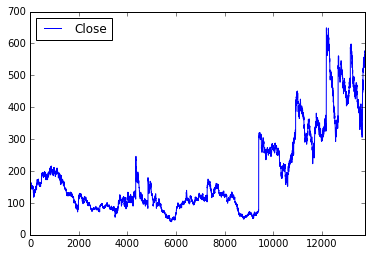

In [32]:
#First we need to extract the two columns we want
IBMpandas_df_subset = IBMpandas_df[list(['Date',"Close"])]
IBMpandas_df_subset.plot.line()

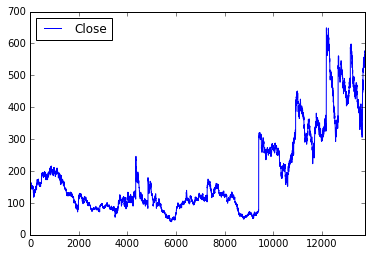

In [33]:
#Let's try to do this again, but using SparkSQL
query = 'select Date, Close from IBM'
IBM2Column =  sqlContext.sql(query)
IBM2Column.toPandas().plot.line()